In [1]:
import numpy as np
import pandas as pd
import itertools

from matplotlib import pyplot
import seaborn as sns

In [2]:
df = pd.read_csv('./benchmark_statistics.csv')
keys_orig = df.keys()
todel = []
for k in keys_orig:
    nk = k.strip(' ')
    if nk != k:
        todel.append(k)
    df[nk] = df[k].values.copy()
for k in todel:
    del df[k]

all_algos = set(df.hash_table_algo.values)
clrs = sns.color_palette("husl", len(all_algos))
marker = itertools.cycle((
    ".", ",", "o", "v", "^", "<", ">", "1", 
    "2", "3", "4", "8", "s", "p", "P", "*", 
    "h", "H", "+", "x", "X", "D", "d"))
markers = {}
algo_clrs = {}
for aidx, algo in enumerate(sorted(all_algos)):
    markers[algo] = next(marker)
    algo_clrs[algo] = clrs[aidx]
df.head()

test_type   nkeys                hash_table_algo  lf_min  \
0  insert_random_shuffle_range  200000            boost_unordered_map   0.509   
1  insert_random_shuffle_range  200000         google_sparse_hash_map   0.763   
2  insert_random_shuffle_range  200000          google_dense_hash_map   0.381   
3  insert_random_shuffle_range  200000  google_dense_hash_map_mlf_0_9   0.763   
4  insert_random_shuffle_range  200000                  libcuckoo_map   0.763   

   lf_avg  lf_std  lf_max  mem_bytes_min  mem_bytes_avg  mem_bytes_std  \
0   0.509     0.0   0.509   2.867200e+04   2.867200e+04   0.000000e+00   
1   0.763     0.0   0.763   5.764494e+17   5.764494e+17   0.000000e+00   
2   0.381     0.0   0.381   1.774603e+13   1.782899e+13   8.000380e+10   
3   0.763     0.0   0.763   1.780747e+13   1.843993e+13   3.175324e+11   
4   0.763     0.0   0.763   0.000000e+00   0.000000e+00   0.000000e+00   

   mem_bytes_max  runtime_sec_min  runtime_sec_avg  runtime_sec_std  \
0   2.867200e+04         0.030979         0.034822         0.002387   
1   5.764494e+17         0.091317         0.093429         0.001618   
2   1.796232e+13         0.016401         0.017174         0.000749   
3   1.863316e+13         0.016645         0.017417         0.000778   
4   0.000000e+00         0.015528         0.021517         0.003416   

   runtime_sec_max  
0         0.038416  
1         0.096120  
2         0.018276  
3         0.018843  
4         0.024501

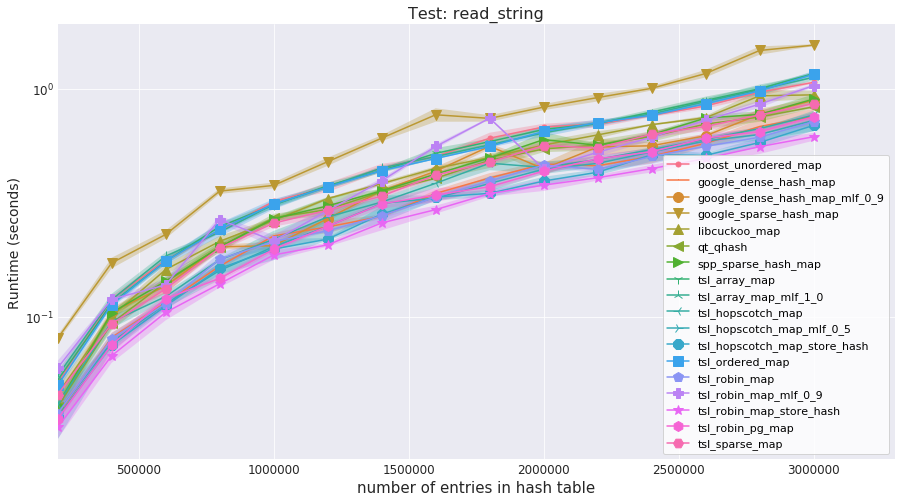

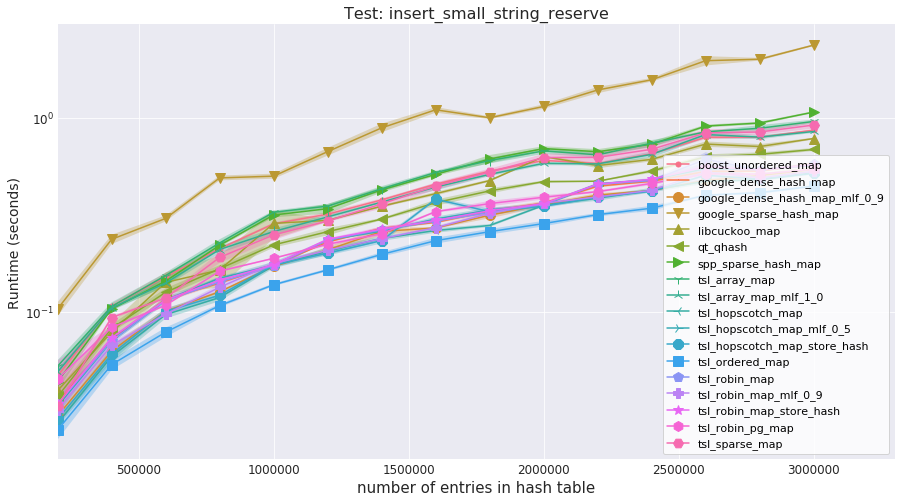

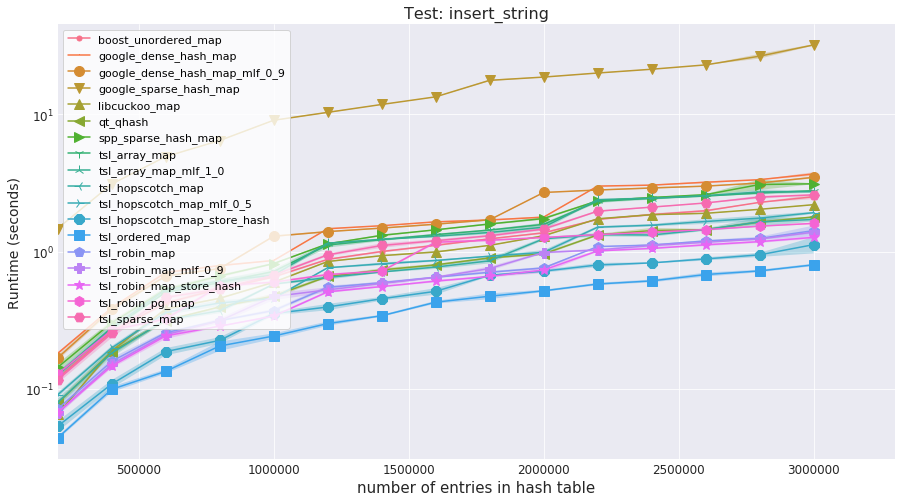

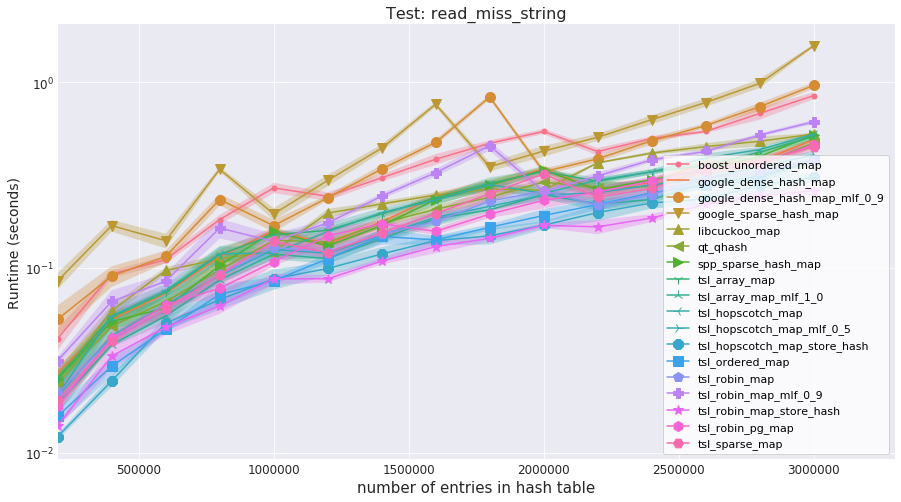

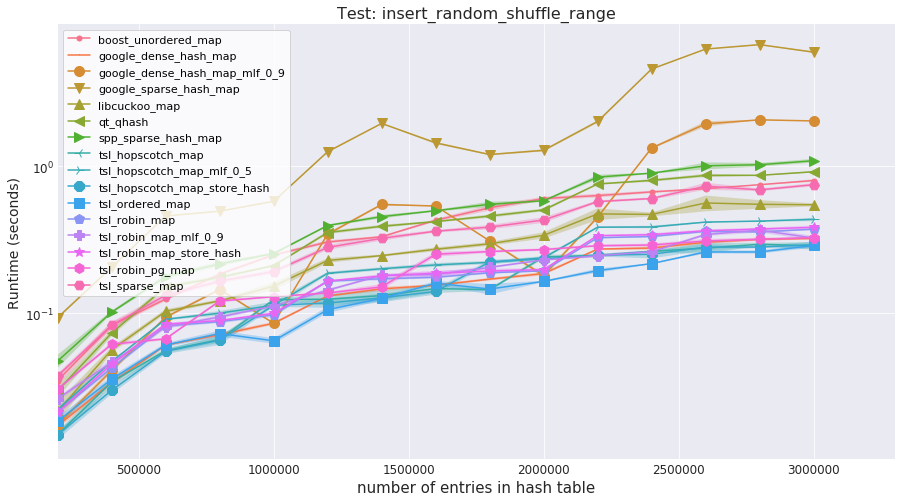

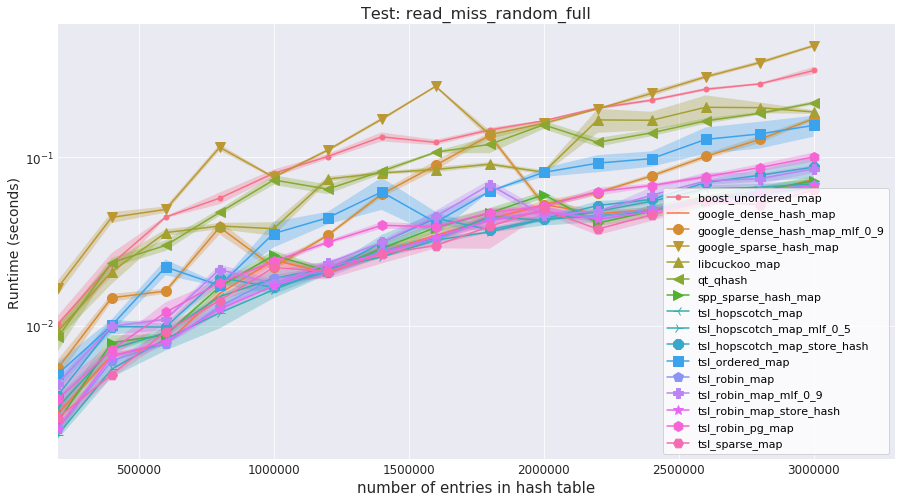

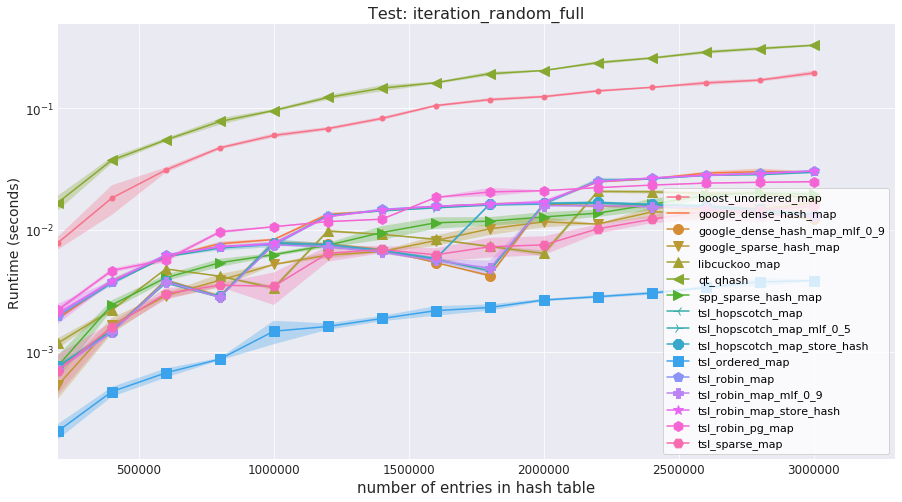

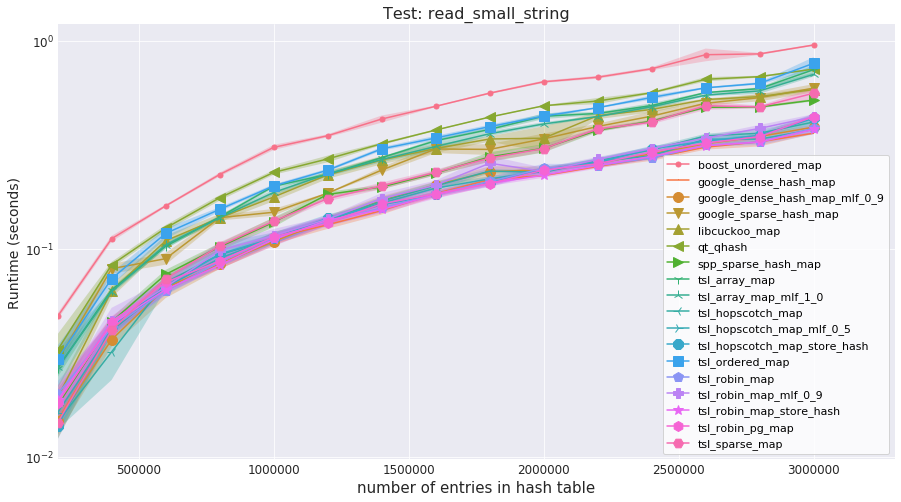

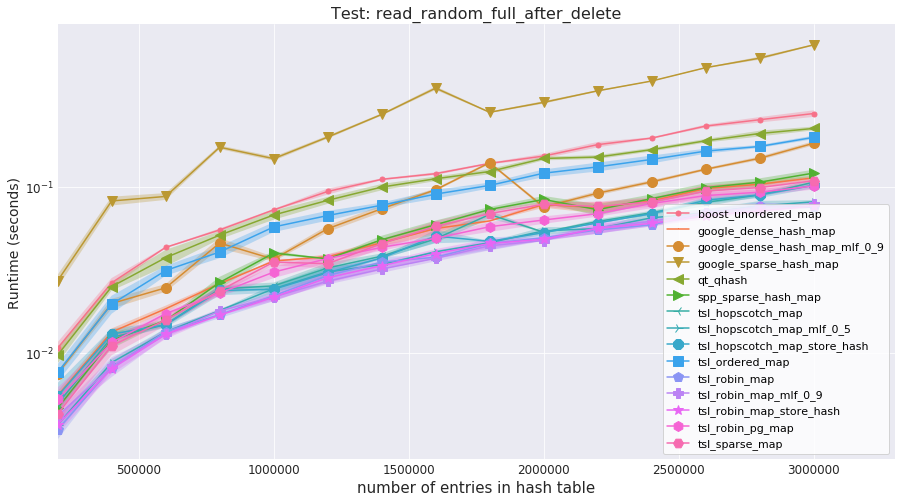

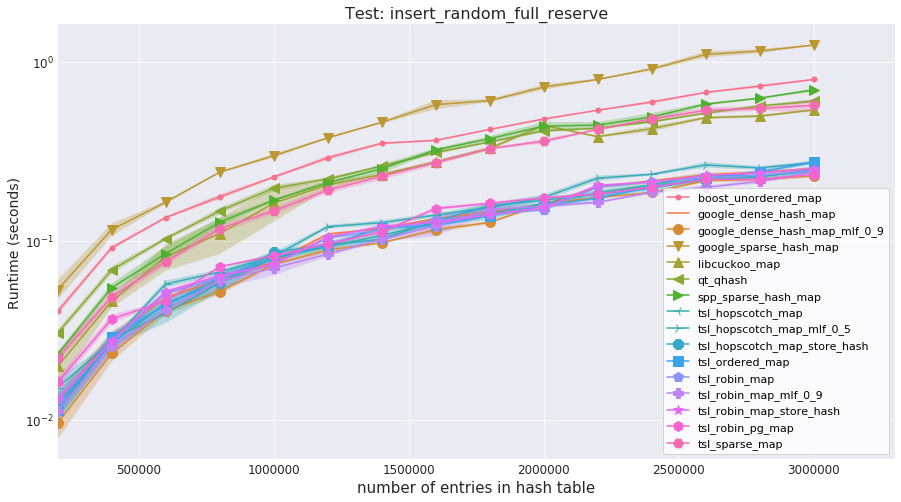

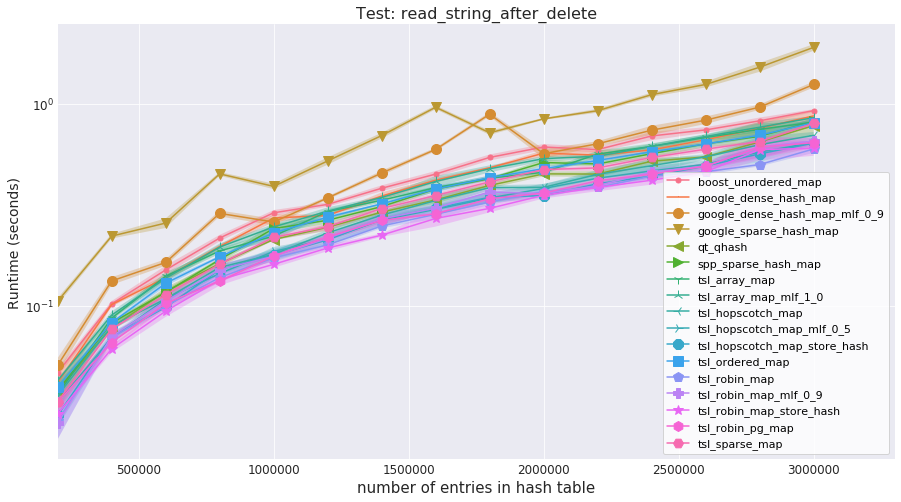

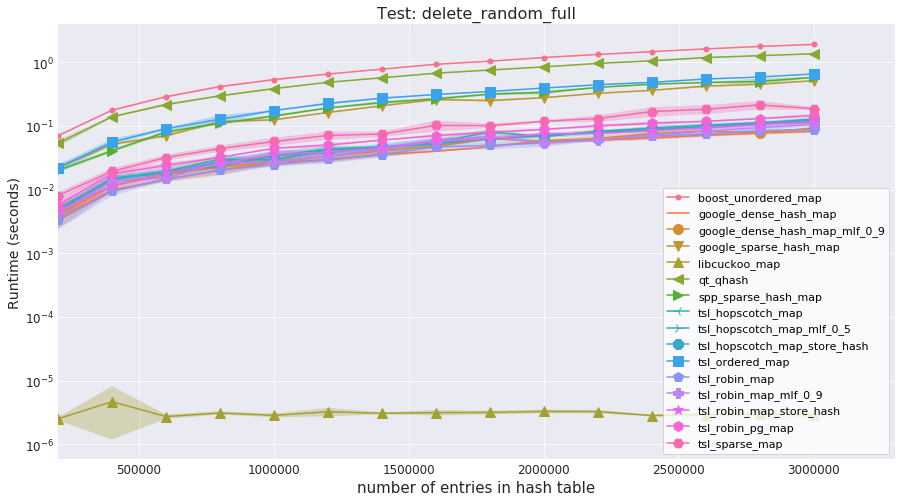

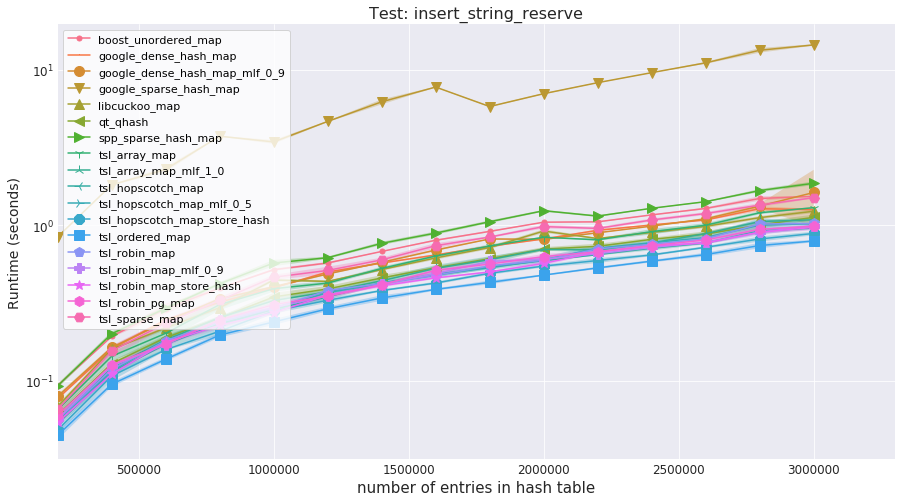

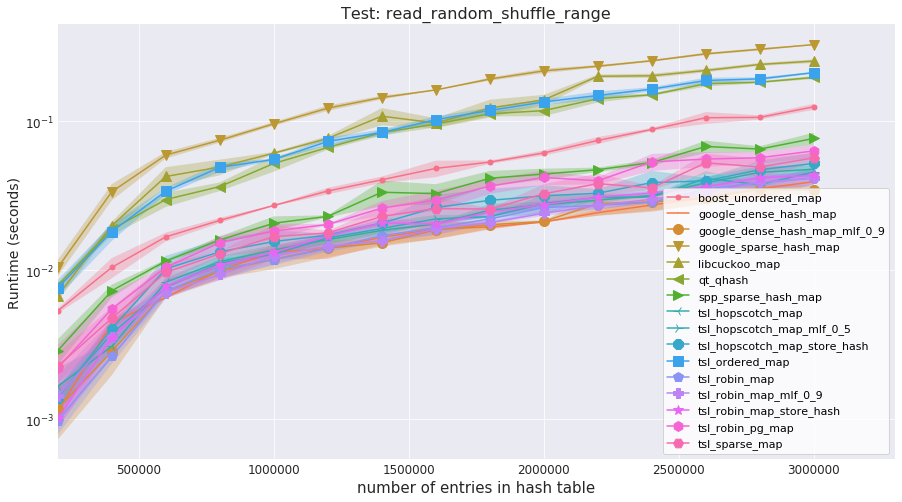

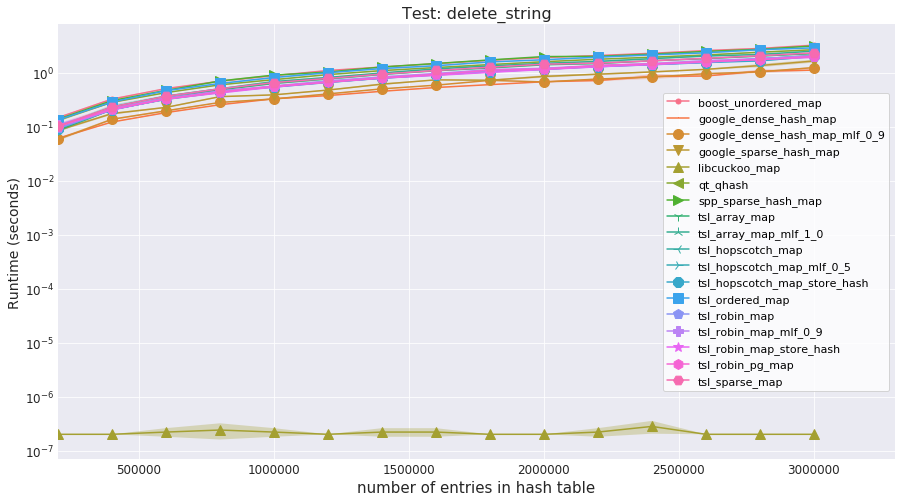

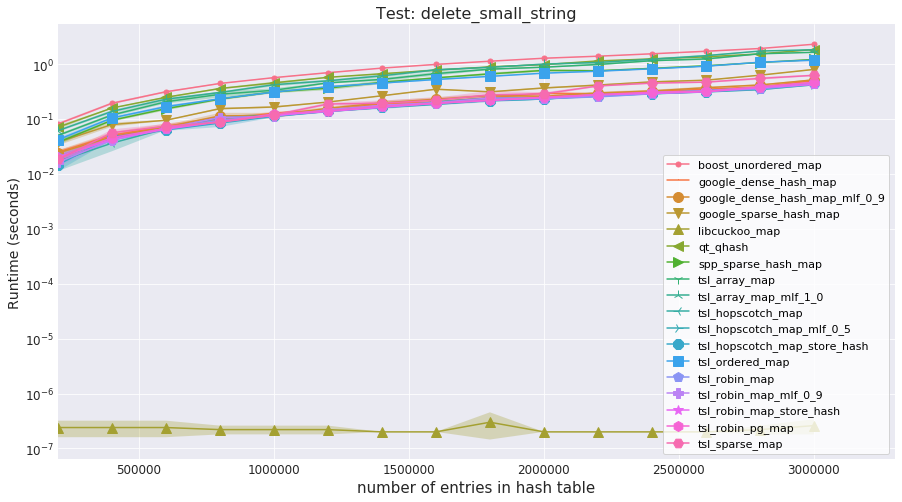

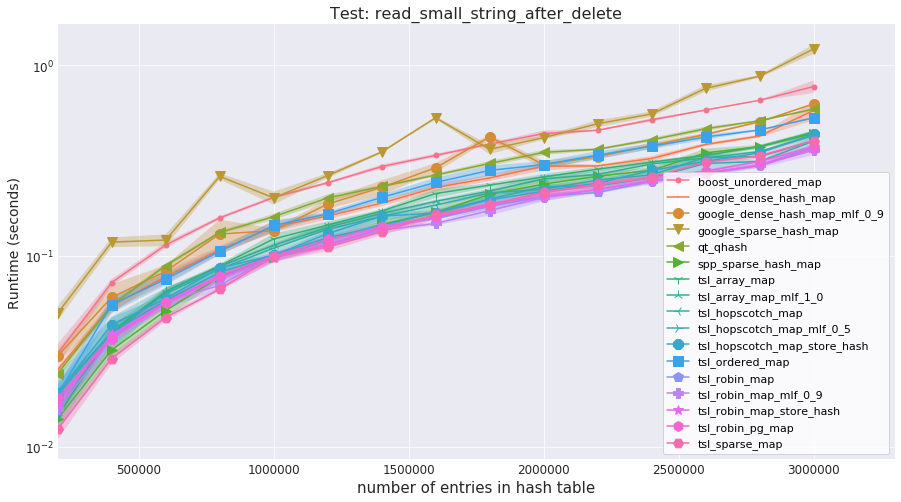

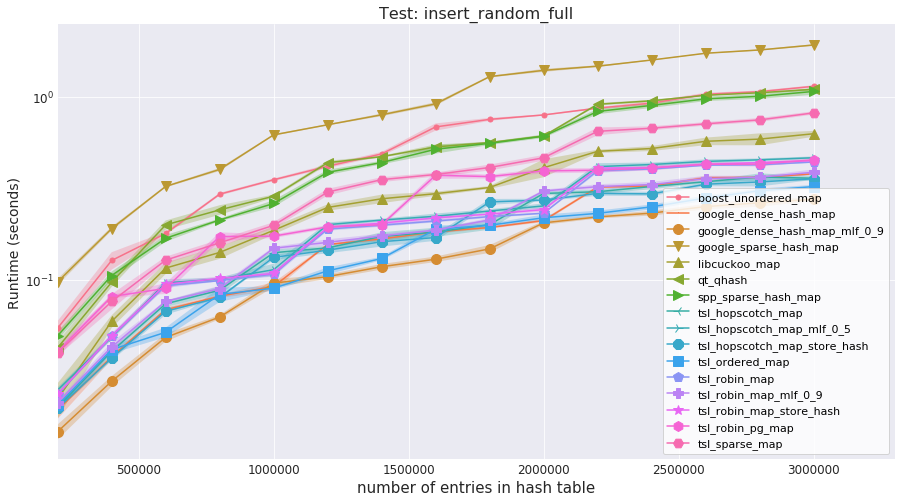

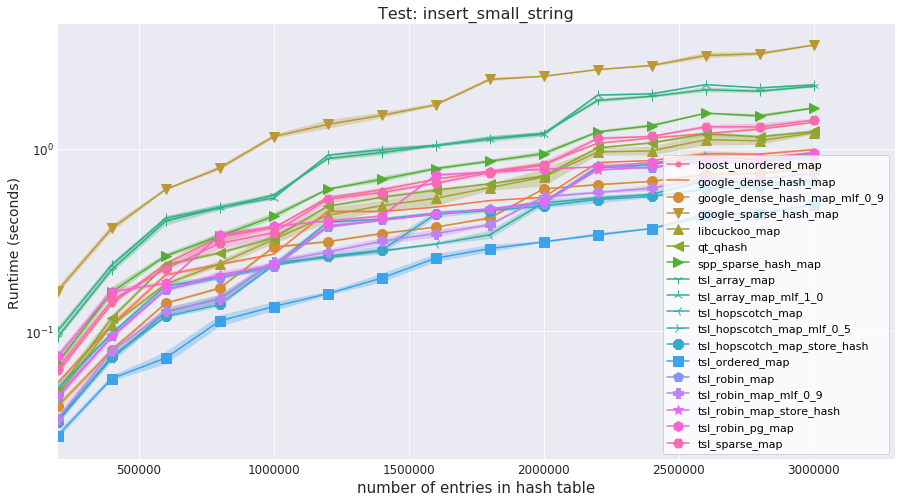

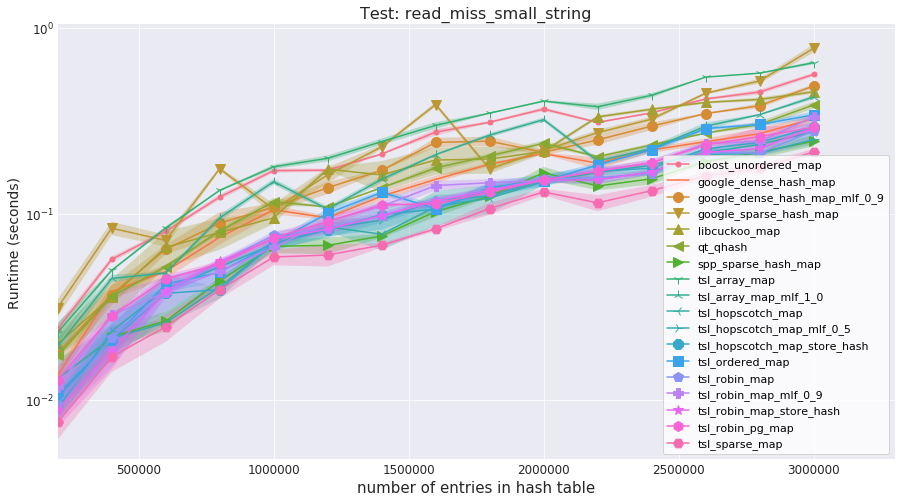

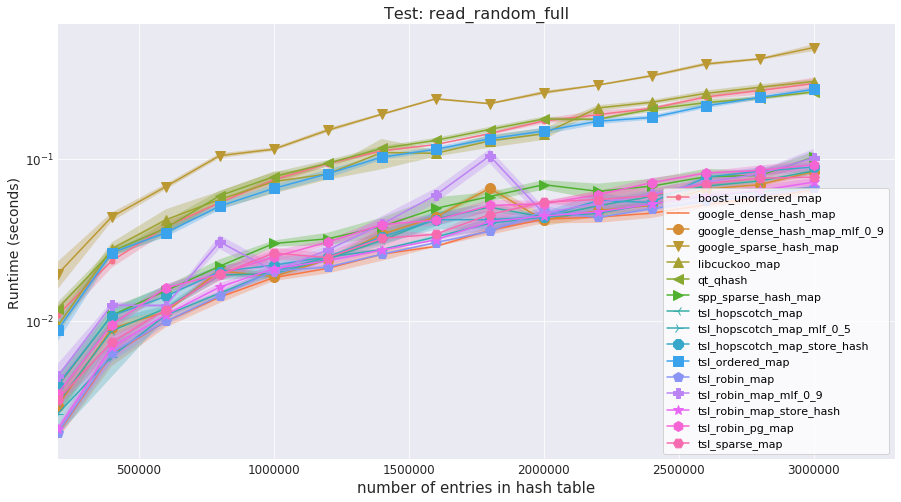

In [3]:
plot_metrics = ['runtime_sec']  # 'lf', 'mem_bytes', ]
x_key, xlabel = 'nkeys', 'number of entries in hash table'
yaxis_lut = {
    'lf': ('Load factor (% table filled)', 'linear'), 
    'mem_bytes': ('Memory utilized (in bytes)', 'linear'), 
    'runtime_sec': ('Runtime (seconds)', 'log')}
figsize = (15, 8)
for pm in plot_metrics:
    for tt in set(df['test_type'].values):
        df_tt = df[df['test_type'].values == tt]
        handles = []
        pyplot.figure(figsize=figsize)
        with sns.axes_style("darkgrid"):
            for a_idx, algo in enumerate(sorted(set(df_tt.hash_table_algo.values))):
                data_index = (df_tt.hash_table_algo.values == algo)
                if data_index.sum():
                    x_keys = df_tt[x_key][data_index].values
                    sort_order = np.argsort(x_keys)
                    x_keys = x_keys[sort_order]

                    mean = df_tt[pm + '_avg'][data_index].values[sort_order]
                    std = df_tt[pm + '_std'][data_index].values[sort_order]

                    ax, = pyplot.plot(
                        x_keys, mean, label=algo, c=algo_clrs[algo], marker=markers[algo], ms=10)
                    handles.append(ax)
                    pyplot.fill_between(
                        x_keys, mean-std, mean+std ,alpha=0.3, facecolor=algo_clrs[algo])               

#         pyplot.axis().set_xscale('log')
        pyplot.xlabel(xlabel, size=15)
        pyplot.yscale(yaxis_lut[pm][1])
        pyplot.ylabel(yaxis_lut[pm][0], size=14)
        pyplot.title(f'Test: {tt}', fontsize=16)
        pyplot.tick_params(axis='both', labelsize=12) #, rotation=80)
        #     pyplot.x
        pyplot.xlim([x_keys.min(), x_keys.max() * 1.1])
        pyplot.legend(handles=handles, fontsize=11)
        pyplot.show()
    